In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [2]:
df = pd.read_csv("Employee.csv")
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


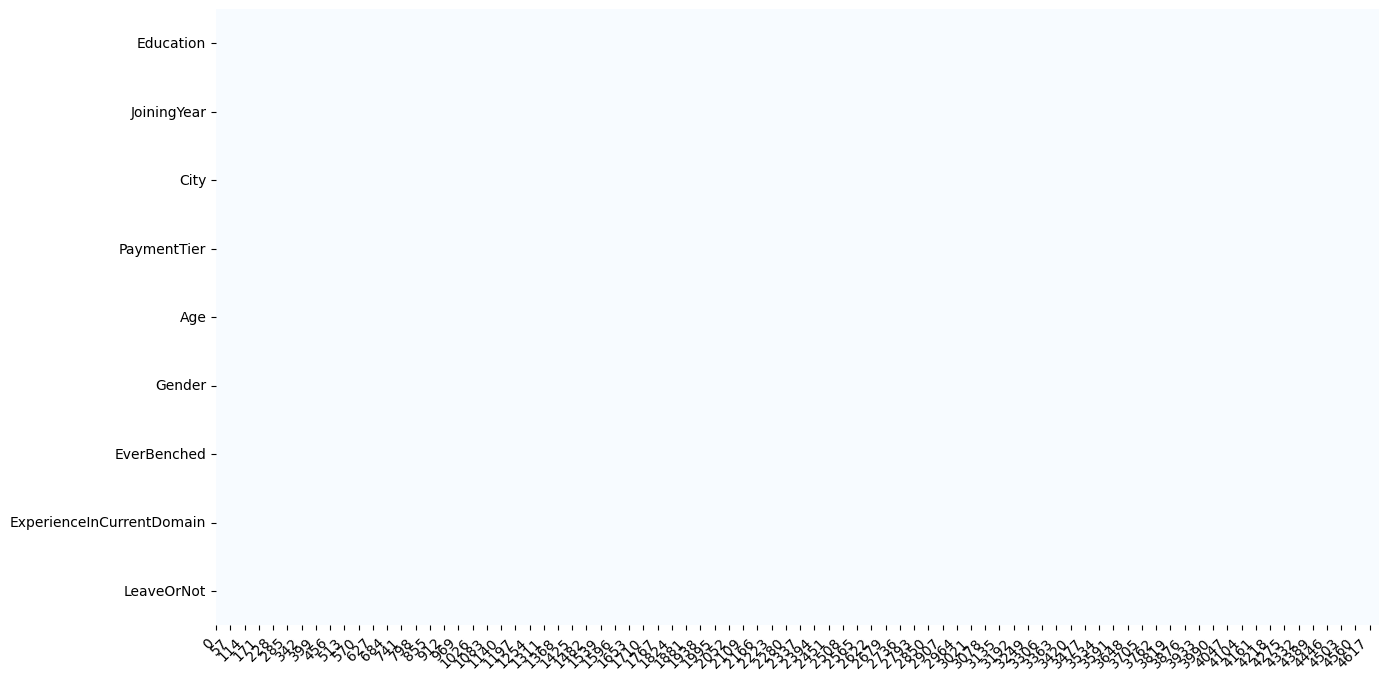

In [3]:
plot_missing_value(df)

In [4]:
df.duplicated().sum()

1889

In [5]:
df.drop_duplicates(keep="first", inplace=True)

In [6]:
X = df.drop(columns=["LeaveOrNot"])
y = df.LeaveOrNot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2211, 8), (553, 8), (2211,), (553,))

In [7]:
X_train.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
814,Masters,2017,Pune,2,25,Male,No,3
3725,Bachelors,2015,New Delhi,2,34,Female,No,5
3767,Bachelors,2017,New Delhi,3,33,Female,No,1
3088,Bachelors,2015,Pune,2,39,Female,No,4
4493,Bachelors,2014,Bangalore,3,39,Male,No,0


In [8]:
X_train.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain'],
      dtype='object')

In [9]:
!pip install xgboost
!pip install --upgrade xgboost


In [14]:
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.tuning import grid_search_params as gsp

# Define your custom transformers if not already defined
# num_pipe and cat_pipe should be functions that return appropriate transformer instances.

preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['JoiningYear', 'Age', 'ExperienceInCurrentDomain']),
    ('categoric', cat_pipe(encoder='onehot'), ['Education', 'City', 'PaymentTier', 'EverBenched']),
])

from xgboost import XGBClassifier
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

model = GridSearchCV(pipeline, gsp.xgb_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 6561 candidates, totalling 19683 fits
{'algo__colsample_bytree': 0.6, 'algo__gamma': 1, 'algo__learning_rate': 0.01, 'algo__max_depth': 6, 'algo__n_estimators': 200, 'algo__reg_alpha': 0.1, 'algo__reg_lambda': 0.01, 'algo__subsample': 0.8}
0.8028041610131162 0.7892356399819086 0.7938517179023508
